In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize']=14,6

from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize']=14,6

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### load the data

### find outliers and perform cluster from Latitude and longitude

In [2]:
df = pd.read_csv('rev_data_for_test.csv')

In [3]:
df.head()

,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 4 columns):
Type               1514 non-null object
Latitude           1514 non-null float64
Longitude          1514 non-null float64
Report Location    1514 non-null object
dtypes: float64(2), object(2)
memory usage: 47.4+ KB


In [5]:
df['Type'].value_counts()

Beaver Accident            508
Latte Spills               416
Marshawn Lynch Sighting    324
Seal Attack                266
Name: Type, dtype: int64

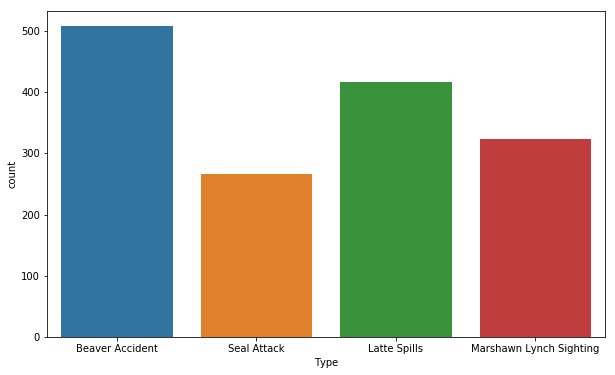

In [6]:
import seaborn as sns
plt.subplots(figsize=(10,6))
sns.countplot(x='Type', data= df)

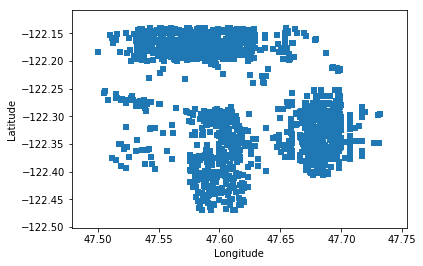

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


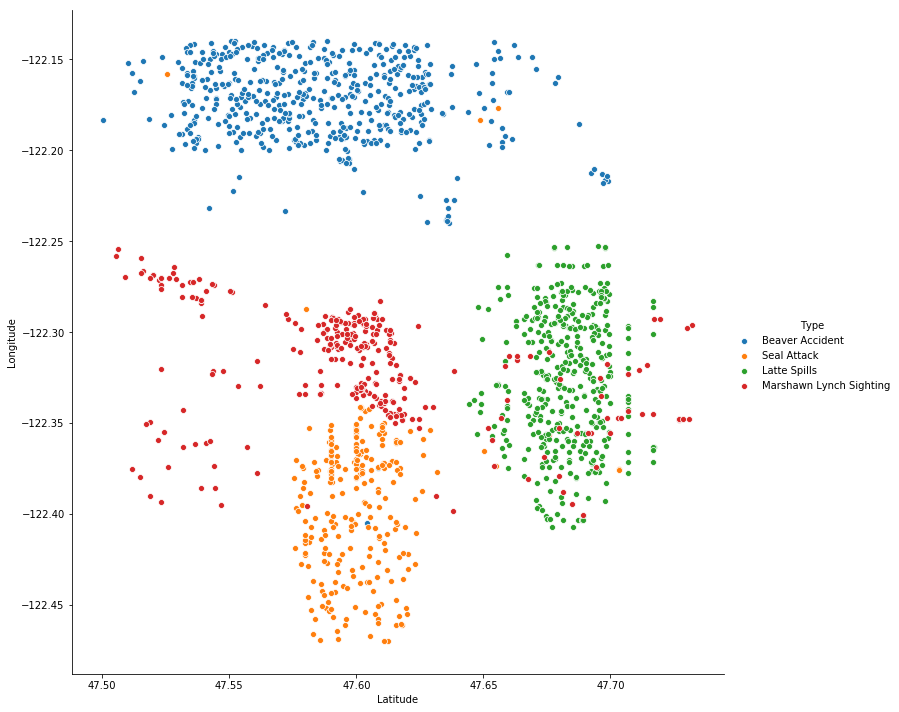

In [7]:
 plt.scatter(df['Latitude'], df['Longitude'], marker= ',', linewidth=0)
 plt.xlabel('Longitude')
 plt.ylabel('Latitude')
 plt.show()

%config InlineBackend.figure_format = 'png'
sns.pairplot(x_vars=["Latitude"], y_vars=["Longitude"], data=df, hue="Type", size=10)

### prepare DBSCAN model

In [ ]:
#train and moel and find outliers

In [8]:
# Identify X & y
X = df.iloc[:, [1, 2]].values
y = df.iloc[:, 0].values

In [9]:
dbscan_df = df[['Latitude','Longitude']]
dbscan_df = dbscan_df.values.astype('float32', copy= False)
dbscan_df

array([[  47.6992  , -122.2167  ],
       [  47.6977  , -122.2164  ],
       [  47.6967  , -122.2131  ],
       ...,
       [  47.6128  , -122.373215],
       [  47.61    , -122.36193 ],
       [  47.6     , -122.35049 ]], dtype=float32)

In [10]:
#normalize the data
dbscan_df_scaler = StandardScaler().fit(dbscan_df)
dbscan_df = dbscan_df_scaler.transform(dbscan_df)
dbscan_df

array([[ 1.5552797 ,  0.75588423],
       [ 1.5263932 ,  0.7592033 ],
       [ 1.5071354 ,  0.7960542 ],
       ...,
       [-0.10948456, -0.99006283],
       [-0.16343561, -0.86419123],
       [-0.35615987, -0.73653245]], dtype=float32)

In [80]:
## construct a model
from sklearn.cluster import DBSCAN
'''
--min_sample :: reqioues a minimum 20 data points in a neighborhood
--eps :: in radius 0.02
'''
model = DBSCAN(eps = .25, min_samples= 12, metric = 'euclidean').\
    fit(dbscan_df)
model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=12, n_jobs=None, p=None)

### visualize results

In [81]:
# separate out liers from clusters
outliers_df = df[model.labels_ == -1]        ### -1 stands for outlier
clusters_df = df[model.labels_ != -1]

In [82]:
labels = model.labels_
labels

array([-1, -1, -1, ...,  2,  2,  2])

In [83]:
# separate out liers from clusters
outliers_df = df[labels == -1]        ### -1 stands for outlier
clusters_df = df[labels != -1]

colors = labels
colors_clusters = colors[colors != -1]
colors_outliers = 'black'

## get info about clusters
clusters = Counter(labels)
print(clusters)
print(df[labels == -1].head())
print('Number of clusters = {}'. format(len(clusters)-1))


Counter({0: 481, 2: 467, 1: 465, -1: 60, 3: 41})
              Type  Latitude  Longitude                        Report Location
0  Beaver Accident   47.6992  -122.2167  (47.6291923608656, -122.186728398282)
1  Beaver Accident   47.6977  -122.2164  (47.5576821104334, -122.156421437319)
2  Beaver Accident   47.6967  -122.2131  (47.6167258135906, -122.173139389518)
3  Beaver Accident   47.6971  -122.2178  (47.5370517340417, -122.197755316941)
4  Beaver Accident   47.6925  -122.2127   (47.6124577512516, -122.14272010056)
Number of clusters = 4


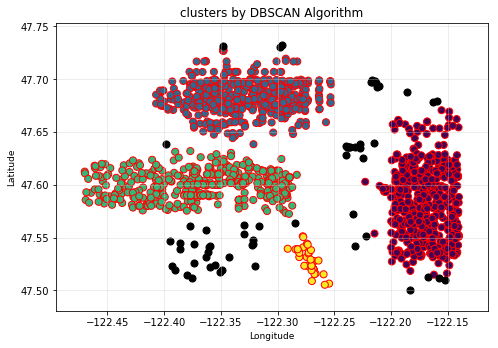

In [84]:
## plot clusters and outliers
fig = plt.figure()

ax =  fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['Longitude'],clusters_df['Latitude'],
           c = colors_clusters, edgecolors = 'red' , s = 50)

ax.scatter(outliers_df['Longitude'],outliers_df['Latitude'],
           c = colors_outliers, edgecolors = 'black' , s = 50)

ax.set_xlabel('Longitude', family = 'Arial' , fontsize = 9)
ax.set_ylabel('Latitude', family = 'Arial' , fontsize = 9)

plt.title('clusters by DBSCAN Algorithm', family = 'Arial' , fontsize = 12 )
plt.grid(which = 'major', color= '#cccccc', alpha = 0.45)

plt.show()

In [85]:
import numpy as np
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores


array([False, False, False, ..., False, False, False])

In [86]:
sample_cores[model.core_sample_indices_]= True

sample_cores[model.core_sample_indices_]

array([ True,  True,  True, ...,  True,  True,  True])

In [87]:
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

n_clusters


4

In [90]:
### The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
print(metrics.silhouette_score(X,labels, metric="euclidean"))

0.4748957457707011
